## Aim : Based on the features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

# Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

survival: Survival

PassengerId: Unique Id of a passenger.

pclass: Ticket class

sex: Sex

Age: Age in years

sibsp: # of siblings / spouses aboard the Titanic

parch: # of parents / children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation

### Import all Required library

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Import Titanic Dataset

In [2]:
data=pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.shape

(891, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data is having 2 features float type , 5 features integer type and 5 features object type.

Features: 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we are seeing that most of the data need to be converted into numeric form. Data also having Nan values present, which we will remove later on. Data also having having a wide range which need to be treated using scaling techniques.

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We are seeing data is having Null values.

For age = 177 missing values

For Cabin= 687 missing values

For Embarked= 2 missing values

<AxesSubplot:>

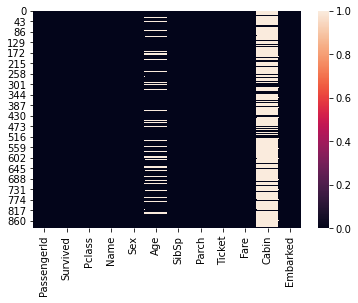

In [8]:
sns.heatmap(data.isnull())

In [9]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

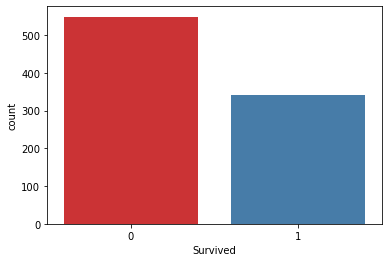

In [10]:
sns.countplot(x='Survived', data= data,palette = "Set1")

Here we can see that 38% of the passenger survived on Titanic.

In [11]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

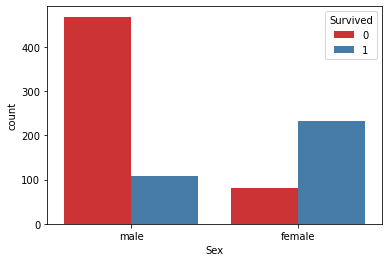

In [12]:
sns.countplot(x='Sex', hue='Survived', data= data, palette = "Set1")

We can see 66 percent of passanger were male.

Here we can see the number of female survived more than the male passenger.

Lets check the Pclass colums with respect to Survived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

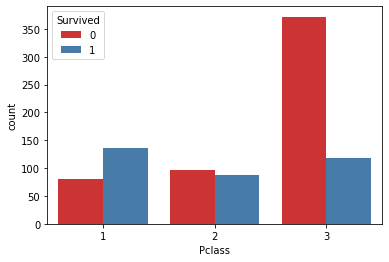

In [13]:
sns.countplot(x='Pclass', hue='Survived', data= data, palette = "Set1")

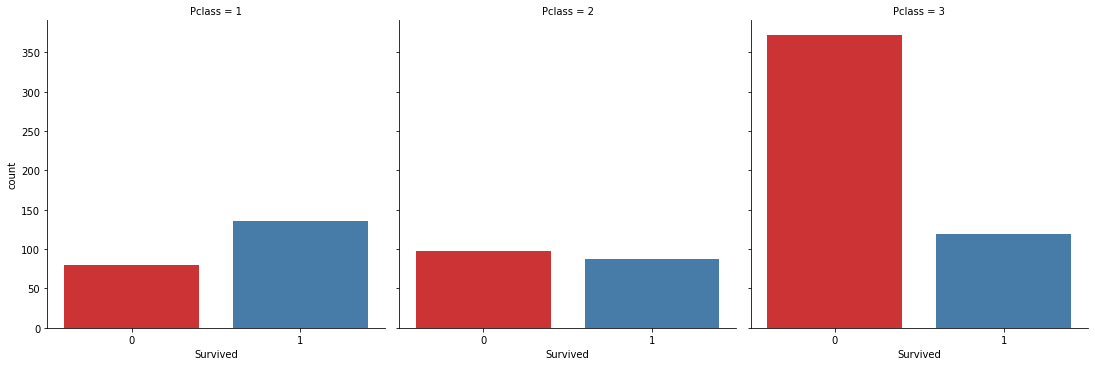

In [14]:
sns.catplot(x="Survived", col="Pclass", col_wrap=4,data=data, kind="count",palette = "Set1")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

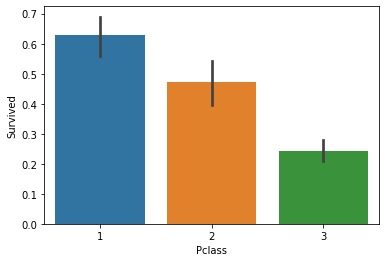

In [15]:
sns.barplot(x='Pclass', y='Survived', data=data)

Here we can see Pclass playing a big role in determing survived case.

Pasanger in Pclass=1 sutvived more than the other calss.

For Pclass= 2 the diffrence is less.

For Pcalss=3 survived is less as compared to not Survived.

Lets talk about the Age column.

<AxesSubplot:xlabel='Age', ylabel='Count'>

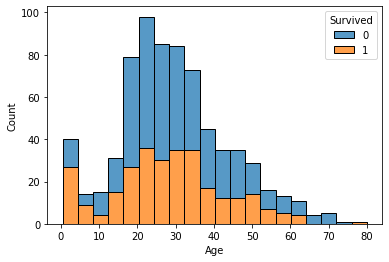

In [16]:
sns.histplot(x="Age",hue='Survived' ,data=data, multiple="stack")   

Here we can see age group (15-40) having high strength in the data. The number of Survived and Not Survived is almost same for these age group. and the data is ditributed between 0.4 to 80 age group.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

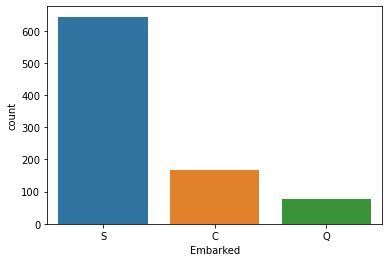

In [17]:
sns.countplot(x='Embarked',data= data)

Embarked implies wher the pasaanger mounted from.

Here S= Southampton, C= Cherbourg and Q= Queenstown.

Most of the pepole boarded from Southampton.

Lets see the survived relationship with Embarked.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

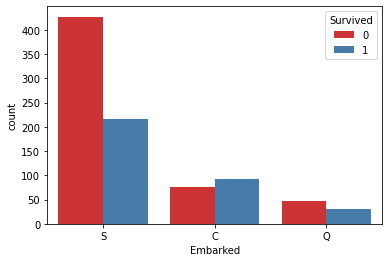

In [18]:
sns.countplot(x="Embarked", hue="Survived", data=data,palette = "Set1")   

If passanger board at Southampton are not likely to survive, according to Embarked data.

Lets check the SibSp column. Which indicates Number of Sibling and spouse.

In [19]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

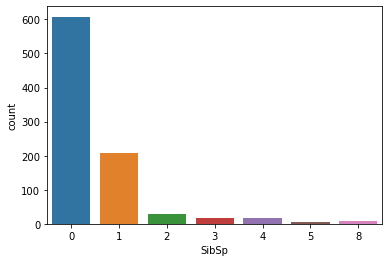

In [20]:
sns.countplot(x='SibSp', data= data)

We can see 68 percent passanger traveled without any sibling or spous and rest of the passanger were there with their spous or siblings.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

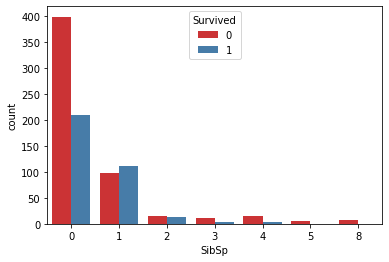

In [21]:
sns.countplot(x="SibSp", hue="Survived", data=data,palette = "Set1")    

Passangers with no siblings or spouse are more likely to not Survived.

Lets Visualise Parch columns. which indicates Parents and children.

In [22]:
data['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

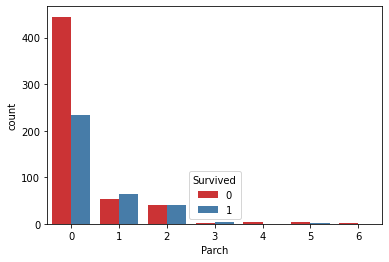

In [23]:
sns.countplot(x="Parch",hue="Survived", data=data,palette = "Set1") 

Passangers without parents and chilren are more likely to not Survived.

### Data cleaning and Data Preprocessing

After analysis, we came to conclusion our Pclass, Sex, Age, SibSp, Parch, Fare and Embarked having relation with target column(Survived). On the oher hand PassengerId,Name,Ticket have no relevent relation with the Target Column.

So we can drop the PassengerId,Name and Ticket column.

Cabin is having lots of missing value, Insted of filling we will drop this column.

In [24]:
data.drop(['PassengerId','Name','Cabin','Ticket'], axis= 1, inplace = True)

In [25]:
data 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Here we are having 177 Null values in Age columns and 2 Null values in Embarked.

We will fill our age column using mean of that column.

In [26]:
data['Age'].fillna(value=data['Age'].mean(), inplace=True)

In [27]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [28]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Here most collom values is S. So we will replavce it with 'S'

In [29]:
data['Embarked'].fillna(value='S', inplace=True)

In [30]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now the Data is not having Null values, lets deal with the string data.

Sex and Embarked columns are having String type data.

We will use LabelEncoder to encode string values.

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']= le.fit_transform(data['Embarked'])

In [32]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [33]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Here we can see data is having 891 counts in each columns, so no null value is present.

For Fare column Fare can not be Zero.

Lets check the Zero values.

In [34]:
data[data['Fare']==0].index

Int64Index([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
            815, 822],
           dtype='int64')

In [35]:
data.drop(index=[179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,815, 822], inplace= True)

In [36]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [37]:
Y=data['Survived']
X= data.drop(columns=['Survived'])

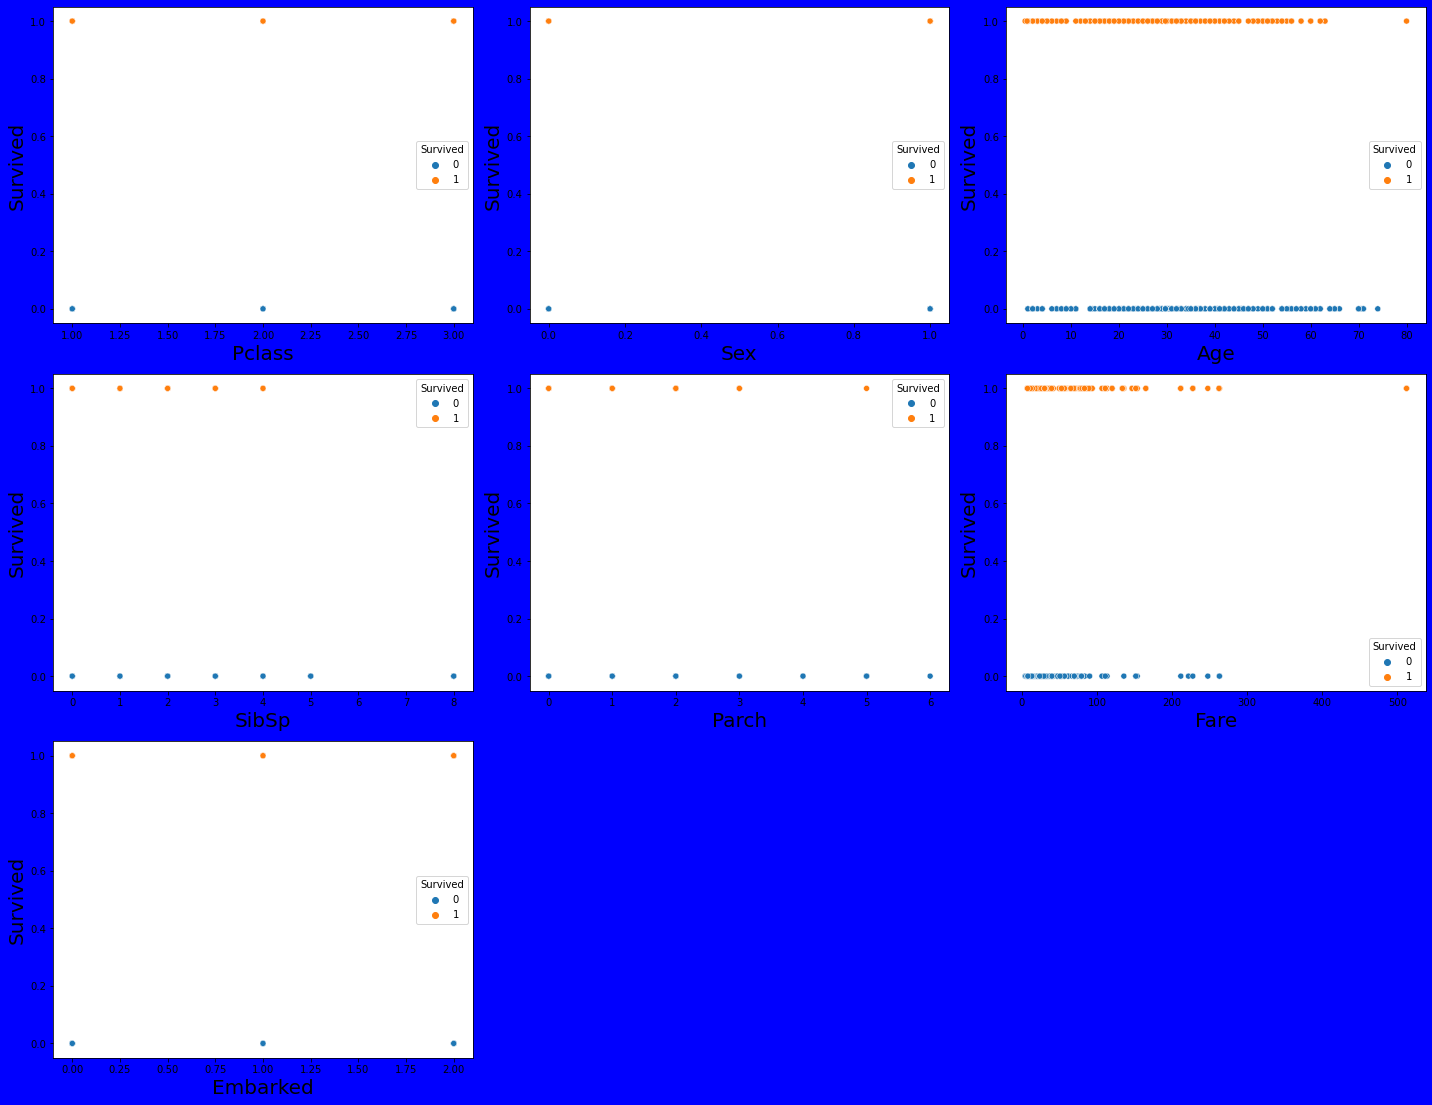

In [38]:
plt.figure(figsize=(20,20), facecolor='blue')
plotnumber= 1

for column in X:
    if plotnumber<=14:
        ax= plt.subplot(4,3, plotnumber)
        sns.scatterplot(X[column], Y, hue=Y)
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Survived', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

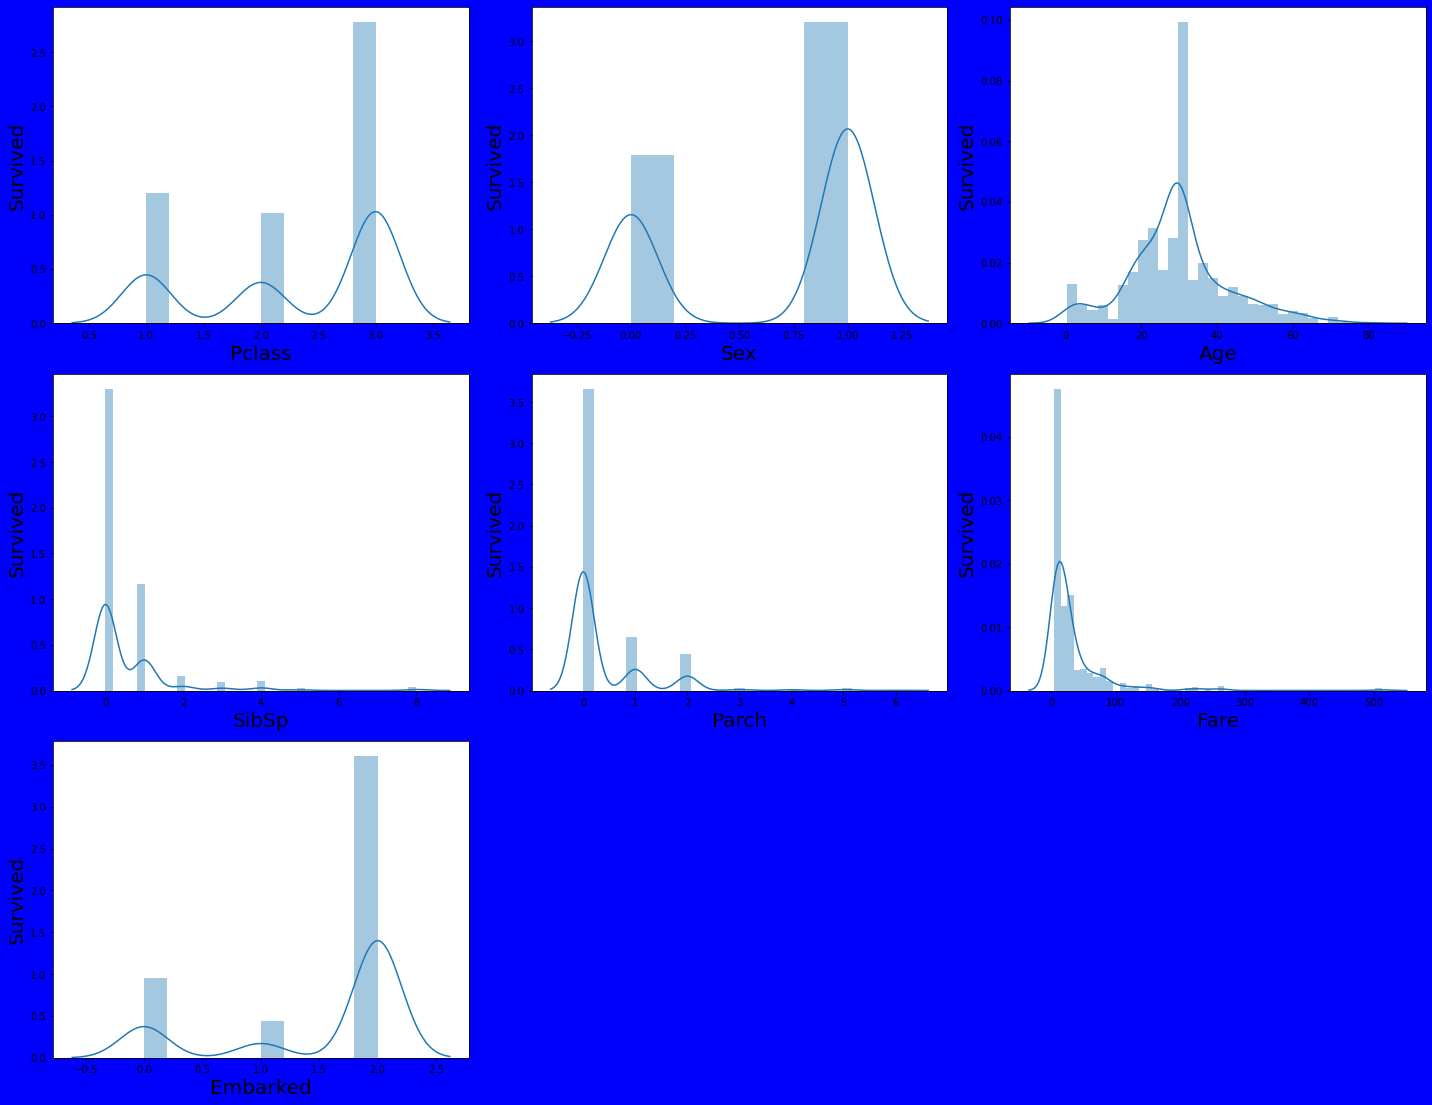

In [39]:
plt.figure(figsize=(20,20), facecolor='blue')
plotnumber= 1

for column in X:
    if plotnumber<=14:
        ax= plt.subplot(4,3, plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Survived', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

In [40]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.351636,-0.540800,-0.066912,-0.040941,0.076939,0.252453,-0.162562
Pclass,-0.351636,1.000000,0.139467,-0.332129,0.080304,0.014962,-0.561517,0.168605
Sex,-0.540800,0.139467,1.000000,0.082290,-0.109357,-0.241093,-0.175592,0.101633
Age,-0.066912,-0.332129,0.082290,1.000000,-0.232110,-0.178430,0.094331,-0.028873
SibSp,-0.040941,0.080304,-0.109357,-0.232110,1.000000,0.412577,0.155240,0.073349
Parch,0.076939,0.014962,-0.241093,-0.178430,0.412577,1.000000,0.212137,0.044769
Fare,0.252453,-0.561517,-0.175592,0.094331,0.155240,0.212137,1.000000,-0.219650
Embarked,-0.162562,0.168605,0.101633,-0.028873,0.073349,0.044769,-0.219650,1.000000


<AxesSubplot:>

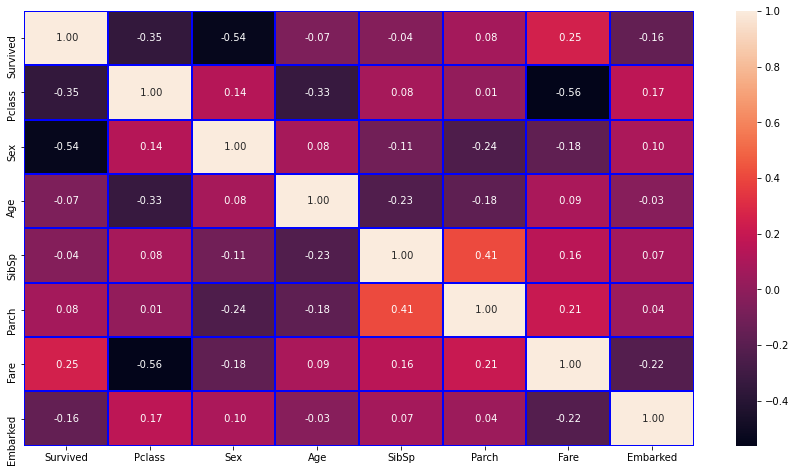

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot= True,linewidths=1, linecolor='blue',fmt=' .2f')

Here we can see Fare and Parch columns are having positive correaltion with Survived other having negative values.

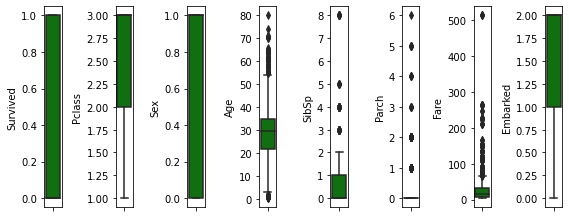

In [42]:
collist=data.columns.values
ncol= 10
nrows= 10

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=data[collist[i]], color='green', orient='x')
    plt.tight_layout()

We are seeing that outliers are present in our data.

# Removing Outliers

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(data))
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 179, 181, 200, 232, 257, 260, 264, 274,
        295, 306, 319, 336, 355, 372, 375, 381, 431, 432, 432, 473, 485,
        519, 533, 534, 549, 559, 601, 621, 628, 662, 667, 668, 672, 675,
        678, 689, 705, 719, 724, 725, 730, 733, 762, 767, 775, 780, 800,
        809, 831, 835, 836, 843, 848, 870], dtype=int64),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [44]:
data_new = data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(876, 8)
(805, 8)


In [45]:
Loss_percentage=(876-805)/876*100
print(Loss_percentage)

8.105022831050228


# Removing Skewness

In [46]:
from sklearn.preprocessing import power_transform

In [47]:
x=data_new.iloc[:,1:]
y=data_new.iloc[:,0]

In [48]:
x=power_transform(x,method='yeo-johnson')

In [49]:
x.shape

(805, 7)

In [50]:
y.shape

(805,)

# Data Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

<AxesSubplot:xlabel='Survived', ylabel='count'>

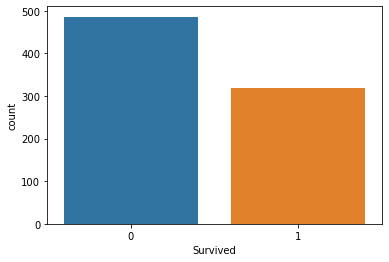

In [52]:
sns.countplot(data_new['Survived'])

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)

In [55]:
X_train_over.shape

(972, 7)

In [56]:
Y_train_over.value_counts()

0    486
1    486
Name: Survived, dtype: int64

In [57]:
xtrain=pd.DataFrame(data=x)

Now our data is balanced.

# VIF Calculation

In [58]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(xtrain.values,i) for i in range(x.shape[1])]
    return(vif)

In [60]:
calc_vif(xtrain)

,variables,VIF FACTOR
0,0,3.539726
1,1,1.132106
2,2,1.232688
3,3,1.482894
4,4,1.405809
5,5,4.422871
6,6,1.021394


As we can see VIF is less than 10 we will not remove any columns, and proceed further.

Since our output is having only two values "0" and "1", we will use binary classification model.

In [61]:
x=xtrain

# Model Design


### Now import all Models

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [63]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  68 The Model performing Well
At Random State 68
Training Accuracy score is- 78.88198757763976
Testing Accuracy Score is- 78.88198757763976
At Random state  110 The Model performing Well
At Random State 110
Training Accuracy score is- 79.5031055900621
Testing Accuracy Score is- 79.5031055900621
At Random state  162 The Model performing Well
At Random State 162
Training Accuracy score is- 79.5031055900621
Testing Accuracy Score is- 79.5031055900621
At Random state  169 The Model performing Well
At Random State 169
Training Accuracy score is- 80.12422360248446
Testing Accuracy Score is- 80.12422360248446
At Random state  171 The Model performing Well
At Random State 171
Training Accuracy score is- 80.12422360248446
Testing Accuracy Score is- 80.12422360248446
At Random state  180 The Model performing Well
At Random State 180
Training Accuracy score is- 79.5031055900621
Testing Accuracy Score is- 79.5031055900621
At Random state  194 The Model performing Well
At Random Sta

At Random state 264 The Model performing Well

At Random State 264

Training Accuracy score is- 80.74534161490683

Testing Accuracy Score is- 80.74534161490683

In [64]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=264,test_size=0.20)

In [65]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.8074534161490683


In [66]:
from sklearn.metrics import classification_report 
print(classification_report(y_test_b, lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        93
           1       0.81      0.71      0.76        68

    accuracy                           0.81       161
   macro avg       0.81      0.79      0.80       161
weighted avg       0.81      0.81      0.81       161



## Cross Validation of the model

In [67]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j)
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 78.50882066096318
Accuracy Score:- 80.74534161490683


at cv:- 3
Cross Validation scre is:- 79.13083282472397
Accuracy Score:- 80.74534161490683


at cv:- 4
Cross Validation scre is:- 78.88281365449978
Accuracy Score:- 80.74534161490683


at cv:- 5
Cross Validation scre is:- 79.1304347826087
Accuracy Score:- 80.74534161490683


at cv:- 6
Cross Validation scre is:- 79.25557398194213
Accuracy Score:- 80.74534161490683


at cv:- 7
Cross Validation scre is:- 79.13043478260869
Accuracy Score:- 80.74534161490683


at cv:- 8
Cross Validation scre is:- 79.62623762376238
Accuracy Score:- 80.74534161490683


at cv:- 9
Cross Validation scre is:- 79.61853239006797
Accuracy Score:- 80.74534161490683




### at cv:- 8
    
Cross Validation scre is:- 79.62623762376238
    
Accuracy Score:- 80.74534161490683


In [68]:
lr_cv_selected= cross_val_score(lr,x,y,cv=8).mean()
print("The cross Val Score is: ",lr_cv_selected, "\n The Accuracy score is: ",lr_score)

The cross Val Score is:  0.7962623762376237 
 The Accuracy score is:  0.8074534161490683


Logistic Regression giving accuracy score= 80.75 Lets try another model to find best score.

# SVC Model

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters= {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'random_state': list(range(0,10))}
svc=SVC()
clf=GridSearchCV(svc, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'kernel': 'poly', 'random_state': 0}


In [70]:
scv=SVC(kernel='poly', random_state=0)
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=8)
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 81.36645962732919
Cross val Score : 80.74752475247526


In [71]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[87  6]
 [24 44]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        93
           1       0.88      0.65      0.75        68

    accuracy                           0.81       161
   macro avg       0.83      0.79      0.80       161
weighted avg       0.82      0.81      0.81       161



Here accuracy score is better than the logistic regreession. we can consider it.buts try other models too.

# Ensemble Techniques
### KNeighborsClassifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':[1,2,3,5,6,7,8,9,10],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}
kn=KNeighborsClassifier()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}


In [73]:
kn=KNeighborsClassifier(algorithm='auto', n_neighbors=10, weights='uniform')
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score: 0', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=8)
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 0 85.09316770186336
Cross val Score : 81.1200495049505


In [74]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[89  4]
 [20 48]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        93
           1       0.92      0.71      0.80        68

    accuracy                           0.85       161
   macro avg       0.87      0.83      0.84       161
weighted avg       0.86      0.85      0.85       161



KNeighborsClassifier having Better score than SVC. We can consider this. Lets try another one.

# RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [10, 20,30,40,60, 80, 100],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, parameters)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}


In [76]:
rf=RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators=30)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8)
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  79.5031055900621
Cross val Score : 80.24876237623762


In [77]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[79 14]
 [19 49]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        93
           1       0.78      0.72      0.75        68

    accuracy                           0.80       161
   macro avg       0.79      0.79      0.79       161
weighted avg       0.79      0.80      0.79       161



RandomForestClassifier is given accuracy_score:  78.88198757763976. check othermodel for better result 

# AdaBoostClassifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier
parameters={'n_estimators':[10,20,30,40,50,70,80,100],'learning_rate':[0.0001,0.001,0.01,0.1,10],'algorithm':['SAMME', 'SAMME.R']}
ad=AdaBoostClassifier()
adclf=GridSearchCV(ad,parameters)
adclf.fit(x_train_b, y_train_b)
print(adclf.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 40}


In [79]:
ad=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 0.1, n_estimators= 40)
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=8)
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  78.88198757763976
Cross val Score : 79.99752475247526


In [80]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[82 11]
 [23 45]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        93
           1       0.80      0.66      0.73        68

    accuracy                           0.79       161
   macro avg       0.79      0.77      0.78       161
weighted avg       0.79      0.79      0.79       161



Still our KNeighborsClassifier is performing well.

# DecisionTreeClassifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
parameters= {'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto','sqrt','log2']}
dt=DecisionTreeClassifier()
dtclf=GridSearchCV(dt,parameters)
dtclf.fit (x_train_b, y_train_b)
print(dtclf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}


In [82]:
dt=DecisionTreeClassifier(criterion='gini', max_features='sqrt', splitter= 'random')
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=8)
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 77.01863354037268
Cross val score is: 76.3960396039604


In [83]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[76 17]
 [20 48]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        93
           1       0.74      0.71      0.72        68

    accuracy                           0.77       161
   macro avg       0.77      0.76      0.76       161
weighted avg       0.77      0.77      0.77       161



DecisionTreeClassifier Not performing well.

# GaussianNB

In [84]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=8)
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)


Accuracy Score is: 72.04968944099379
Cross Val Score is : 76.03341584158416


In [85]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[71 22]
 [23 45]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        93
           1       0.67      0.66      0.67        68

    accuracy                           0.72       161
   macro avg       0.71      0.71      0.71       161
weighted avg       0.72      0.72      0.72       161



GaussianNB also not perform all.

So can see KNeighborsClassifier is performing well we will consider this model as best fit model.

# AUC ROC Curve:

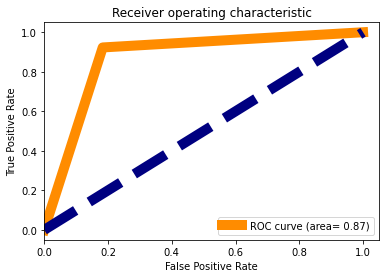

In [86]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(kn_pred, y_test_b)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Now save Best Model

In [87]:
import pickle
filename="Titanic_survive_sinking.pkl "
pickle.dump(kn, open(filename,'wb'))

In [88]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(kn.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,1,0
2,0,0
3,1,1
4,1,0
...,...,...
156,0,0
157,0,0
158,0,0
159,0,0


### Here we are seeing both original and predicted data